In [27]:
import numpy as np
import pandas as pd
import scipy.special

import bootcamp_utils
import altair as alt

# Lesson 26

In [2]:
my_ar = np.array([1, 2, 3, 4])

my_ar

array([1, 2, 3, 4])

In [3]:
my_ar.dtype

dtype('int64')

In [4]:
my_ar.shape

(4,)

In [5]:
my_ar.astype(float)

array([1., 2., 3., 4.])

In [8]:
print(my_ar.max())
print(my_ar.min())
print(my_ar.sum())
print(my_ar.mean())
print(my_ar.std())

4
1
10
2.5
1.118033988749895


In [9]:
print(np.max(my_ar))
print(np.min(my_ar))
print(np.sum(my_ar))
print(np.mean(my_ar))
print(np.std(my_ar))

4
1
10
2.5
1.118033988749895


In [10]:
n=10

np.zeros(n)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
np.ones(n)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
np.empty(n)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
my_ar = np.array([[1, 2], [3, 4]])
np.zeros_like(my_ar)

array([[0, 0],
       [0, 0]])

In [15]:
my_ar = np.array([1, 2, 3, 4])

np.exp(my_ar)

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [16]:
np.cos(my_ar)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362])

In [17]:
np.sqrt(my_ar)

array([1.        , 1.41421356, 1.73205081, 2.        ])

In [18]:
np.dot(my_ar, my_ar)

30

In [19]:
np.pi

3.141592653589793

In [20]:
scipy.special.erf(my_ar)

array([0.84270079, 0.99532227, 0.99997791, 0.99999998])

In [21]:
print(sum(my_ar))

10


In [22]:
x = np.random.random(10000)

def python_sum(x):
    x_sum = 0.0
    for y in x:
        x_sum += y
    return x_sum

%timeit python_sum(x)

934 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%timeit np.sum(x)

5.96 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Lesson 27

In [28]:
df = pd.read_csv('../data/c_elegans_egg_xa.csv', comment='#')

In [29]:
df.head()

,food,area (sq um)
0,high,2061
1,high,1792
2,high,1852
3,high,2091
4,high,1781


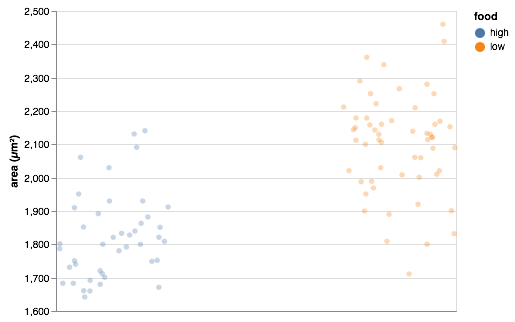

In [33]:
bootcamp_utils.altair_jitter(df,
                             encode_x=alt.X('food:N'),
                             encode_y=alt.Y('area (sq um):Q',
                                           title='area (µm²)',
                                           scale=alt.Scale(zero=False))
                            ).configure_point(filled=True,
                                              opacity=0.3)

In [34]:
xa_high = df.loc[df['food'] == 'high', 'area (sq um)']

xa_high.head()

0    2061
1    1792
2    1852
3    2091
4    1781
Name: area (sq um), dtype: int64

In [35]:
type(xa_high)

pandas.core.series.Series

In [37]:
xa_high_np = xa_high.values

type(xa_high_np)

numpy.ndarray

In [38]:
xa_high_np

array([2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892, 1951,
       1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683, 1671,
       1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701, 2141,
       1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828])

In [39]:
xa_low = df.loc[df['food'] == 'low', 'area (sq um)'].values
xa_low

array([2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280, 1809,
       2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460, 2021,
       2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021, 1969,
       2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061, 2121,
       1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222, 2121,
       2409])

In [40]:
xa_high = xa_high_np
xa_high, xa_low

(array([2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892, 1951,
        1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683, 1671,
        1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701, 2141,
        1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828]),
 array([2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280, 1809,
        2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460, 2021,
        2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021, 1969,
        2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061, 2121,
        1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222, 2121,
        2409]))

In [42]:
xa_high / 1e6

array([0.002061, 0.001792, 0.001852, 0.002091, 0.001781, 0.001912,
       0.001802, 0.001751, 0.001731, 0.001892, 0.001951, 0.001809,
       0.001683, 0.001787, 0.00184 , 0.001821, 0.00191 , 0.00193 ,
       0.0018  , 0.001833, 0.001683, 0.001671, 0.00168 , 0.001692,
       0.0018  , 0.001821, 0.001882, 0.001642, 0.001749, 0.001712,
       0.001661, 0.001701, 0.002141, 0.001863, 0.001752, 0.00174 ,
       0.001721, 0.00166 , 0.00193 , 0.00203 , 0.001851, 0.002131,
       0.001828])

In [43]:
xa_high < 2000

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True])

In [47]:
(xa_high > 2000).all()

False

In [48]:
np.isclose(1.3, 1.29999999999)

True

In [49]:
np.isclose(xa_high, 1800)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [50]:
np.allclose(xa_high, 1800)

False

In [53]:
xa_low_slice = xa_low[:len(xa_high)]

In [54]:
xa_high + xa_low_slice

array([4151, 3961, 3840, 4303, 4120, 3901, 3946, 4041, 3651, 4172, 3760,
       3967, 3483, 3920, 3900, 3981, 3911, 3960, 3888, 3784, 4143, 3692,
       3690, 3831, 3960, 3927, 4053, 3755, 3928, 3602, 3840, 3722, 4110,
       4013, 3652, 4007, 3432, 3561, 4044, 4142, 4212, 4261, 3889])

In [56]:
np.isclose(xa_high, xa_low_slice)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [57]:
xa_high[::-1]

array([1828, 2131, 1851, 2030, 1930, 1660, 1721, 1740, 1752, 1863, 2141,
       1701, 1661, 1712, 1749, 1642, 1882, 1821, 1800, 1692, 1680, 1671,
       1683, 1833, 1800, 1930, 1910, 1821, 1840, 1787, 1683, 1809, 1951,
       1892, 1731, 1751, 1802, 1912, 1781, 2091, 1852, 1792, 2061])

In [58]:
xa_high[3::5]

array([2091, 1731, 1787, 1800, 1692, 1749, 1863, 1930])

In [59]:
xa_high[10:21]

array([1951, 1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683])

In [60]:
my_ar = np.array([1, 2, 3, 4])

my_ar[2] = 6

my_ar

array([1, 2, 6, 4])

In [61]:
my_ar2 = my_ar.copy()

my_ar2[3] = 10

my_ar, my_ar2

(array([1, 2, 6, 4]), array([ 1,  2,  6, 10]))

In [66]:
xa_low_2d = xa_low.reshape((7,8))

In [67]:
xa_low_2d[3,1]

2106

# Lesson 28

In [72]:
df = pd.read_csv('../data/retina_spikes.csv', comment='#')
df = df.iloc[:1000, :]

df.head()

,t (ms),V (uV)
0,703.96,4.79
1,704.00,-0.63
2,704.04,5.83
3,704.08,0.31
4,704.12,-4.58


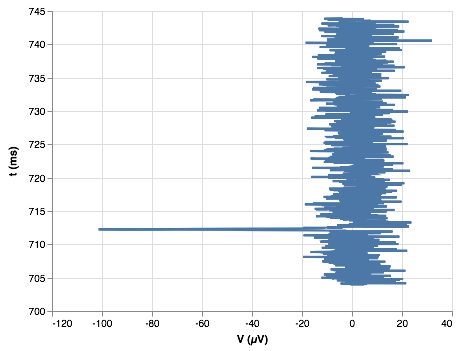

In [79]:
alt.Chart(df
    ).mark_line(
    ).encode(
        y=alt.Y('t (ms):Q', scale=alt.Scale(zero=False)),
        x=alt.X('V (uV):Q', title='V (µV)'),
        order=alt.Order('t (ms):Q', sort='ascending')
    )

In [95]:
#The x-values we want
x = np.linspace(-15,15,400)

# THe normalized intensity
norm_I = 4 * (scipy.special.j1(x) / x)**2

In [96]:
df_airy = pd.DataFrame(data={'x': x,
                             'norm_I': norm_I})

df_airy.head()

,x,norm_I
0,-15.000000,0.000748
1,-14.924812,0.000767
2,-14.849624,0.000777
3,-14.774436,0.000779
4,-14.699248,0.000772


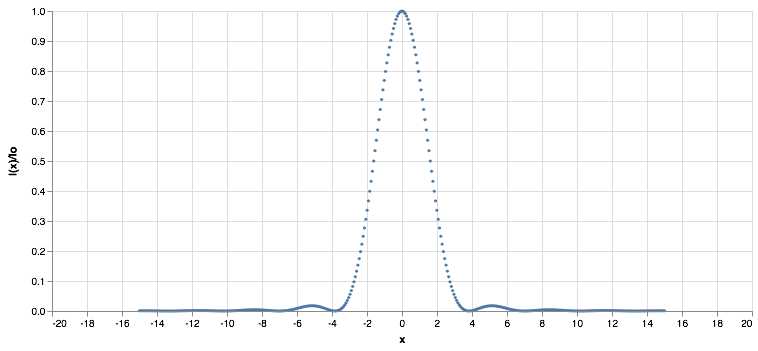

In [102]:
alt.Chart(df_airy,
    height=300,
    width=700
    ).mark_point(
        size=10,
        filled=True,
        opacity=1
    ).encode(
        x='x:Q',
        y=alt.Y('norm_I:Q', title='I(x)/Io'),
        order='x:Q'
    )

In [104]:
df = pd.read_csv('../data/gfmt_sleep.csv', comment='#')
df['insomnia'] = df['sci'] <= 16

In [106]:
def ecdf_y(data):
    """Give y-values of an ECDF for an unsorted column in a data frame.
    
    Parameters
    ----------
    data : Pandas Series
        Series (or column of a DataFrame) from which to generate ECDF
        values

    Returns
    -------
    output : Pandas Series
        Corresponding y-values for an ECDF when plotted with dots.

    Notes
    -----
    .. This only works for plotting an ECDF with points, not for formal
       ECDFs
    """
    return data.rank(method='first') / len(data)

In [107]:
grouped = df.groupby('insomnia')
df['percent correct ecdf_y grouped by insomnia'] = (
    grouped['percent correct'].transform(ecdf_y))

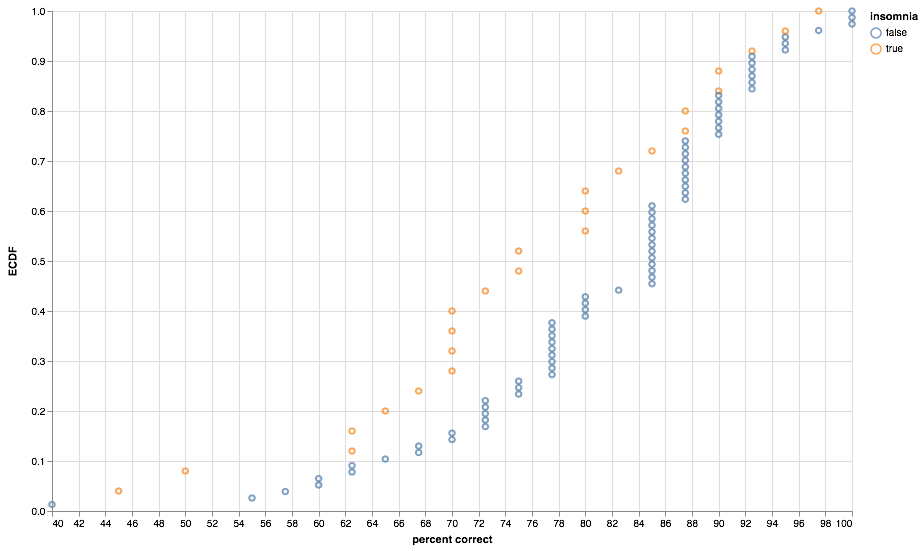

In [113]:
alt.Chart(df,
    height=500,
    width=800
    ).mark_point(
    ).encode(
        x=alt.X('percent correct:Q', scale=alt.Scale(zero=False)),
        y=alt.Y('percent correct ecdf_y grouped by insomnia:Q',
                title='ECDF'),
        color='insomnia:N')